In [2]:
import pandas as pd
import altair as alt
import numpy as np
import altair_catplot as altcat
from altair import datum

In [3]:
crime_data = pd.read_csv('../data/hate_crimes.csv')

In [4]:
def graph_3_4():

    crime_data_n = crime_data

    crime_data_n['avg_hatecrimes_fbi_10days'] = ((crime_data_n['avg_hatecrimes_per_100k_fbi']/365)*10)

    crime_data_n['prop'] = (crime_data_n['hate_crimes_per_100k_splc'] - crime_data_n['avg_hatecrimes_fbi_10days'])/crime_data_n['avg_hatecrimes_fbi_10days']

    mean_crime = crime_data_n['avg_hatecrimes_fbi_10days'].mean()

    conditions = [
        (crime_data_n['avg_hatecrimes_fbi_10days'] <= mean_crime ),
        (crime_data_n['avg_hatecrimes_fbi_10days'] > mean_crime)]
    choices = ['low baseline crime rate', 'high baseline crime rate']
    crime_data_n['crime_rate_bracket'] = np.select(conditions, choices)
    
    crime_data_n['diff_hatecrime'] = (crime_data_n['hate_crimes_per_100k_splc'] - crime_data_n['avg_hatecrimes_fbi_10days'])
    crime_data_sorted_trump = crime_data_n.sort_values(by='share_voters_voted_trump')

    # defing function
    state_selector = alt.selection_multi(fields=['state'])

    l = alt.Chart(crime_data_n, title = "States with low baseline crime rate").mark_bar().encode(
            alt.X('state:N', title = '', axis=alt.Axis(labelAngle = -45)),
            alt.Y('prop:Q', title = 'Rate of change of hate crime pre and post election'),
            color=alt.condition(state_selector, alt.ColorValue("steelblue"), alt.ColorValue("grey"))
        ).transform_filter((datum.crime_rate_bracket == 'low baseline crime rate'))

    h = alt.Chart(crime_data_n, title = "States with high baseline crime rate").mark_bar().encode(
            alt.X('state:N', axis=alt.Axis(labelAngle = -45),  title = ''),
            alt.Y('prop:Q', title = 'Rate of change of hate crime pre and post election', scale=alt.Scale(domain=[0, 30])),
            color=alt.condition(state_selector, alt.ColorValue("steelblue"), alt.ColorValue("grey"))
        ).transform_filter((datum.crime_rate_bracket == 'high baseline crime rate')).properties(width = 500)


    heatmap = alt.Chart(crime_data_sorted_trump, width= 450, title = "2016 U.S. election: Change in hate crime rate and voting trend ").mark_rect().encode(
        alt.X('state', sort=None, title=" ", axis=alt.Axis(labelAngle = -45)),
        alt.Y('share_voters_voted_trump', title="Share of Trump voters (%)"),
        alt.Color('diff_hatecrime', title="Change in hate crime rate (%)"),
        tooltip = [alt.Tooltip('state', title = 'State'),
                   alt.Tooltip('hate_crimes_per_100k_splc', title = "Hate crime rate 10 days after election"),
                   alt.Tooltip('avg_hatecrimes_fbi_10days', title = "Average rate of hate crime (for 10 days")]
    ).properties(width = 1000).add_selection(state_selector)

    return alt.vconcat(
        heatmap,
        l | h)

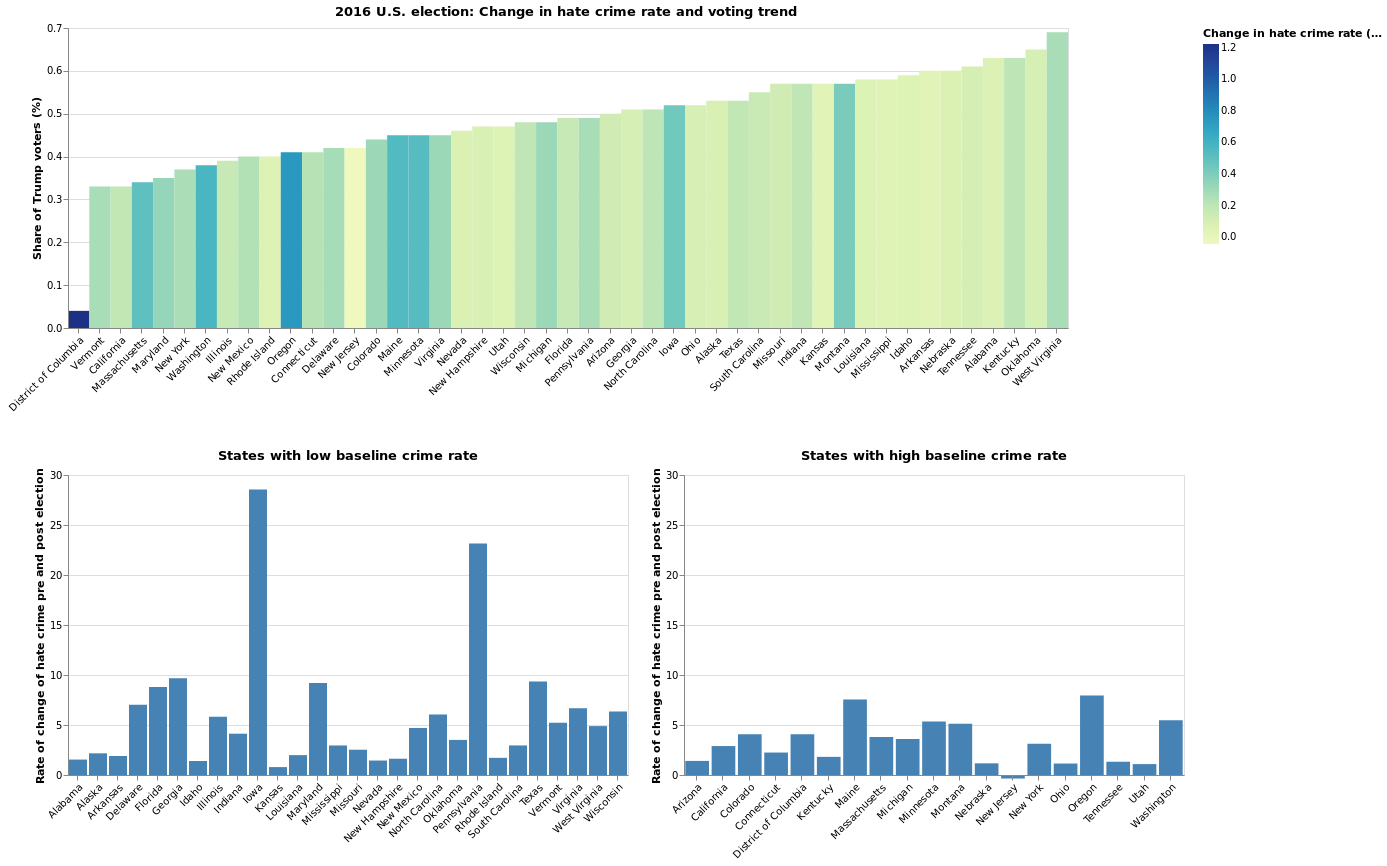

In [5]:
graph_3_4()